# Spam Detection

In [ ]:
!pip install 

In [1]:
# In the spam detection problem, there are 2 classes: C1 which is the no-spam (ham) class and C2 which is the spam class. X is essentially each email present in the training data. To convert X into a machine-readable form (number), we basically need to convert X into a vector. We achieve it by the following way:

# Create an ordered list of all the words in the vocabulary. For instance, suppose we have the following words in the vocabulary: [lottery, how, won, offer, thanks, the, you].
# To convert an email into a vector, map out the number of times each word occurs in that email. For instance, consider the following email: you won the lottery. The vector form of the above email would be [1, 0, 1, 0, 0, 1, 1].
# Now that we have mapped each email into a vector, we can apply the Naive Bayes algorithm on the data. Observe that in the above process, we assumed that each word is produced independent of each other and we discarded the ordering of words in the email. This exactly is the “Naive” assumption and that’s how we plan to apply the Naive Bayes algorithm to this problem.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [3]:
# Any results you write to the current directory are saved as output.
data = pd.read_csv('spam.csv',encoding='latin-1')
# data=data.drop(['2','3','4'])
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"class", "v2":"text"})
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['length'] = data['text'].apply(len)
data.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


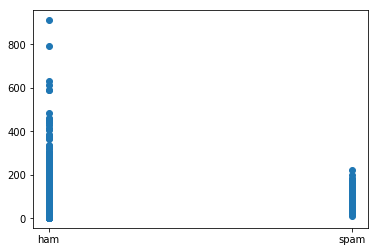

In [6]:
plt.scatter(data['class'],data['length'])

In [8]:
# check the length of each text messages to see whether it is correlated with the text classified as a spam or not.

In [ ]:
for word in text.split()
        if word.lower is not in 
     return word

In [10]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [11]:
#with countvectorizer

# You must always have a 1D object so CountVectorizer can turn into a 2D object for the model to be built on
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer()#lower_case=True made all lowercase
# vect.fit(train) learns the vocabulary of the training data
# vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
X1 = vectorizer.fit_transform(data['text'].copy())#transform training data into a 'document-term matrix'

# document = rows
# term = columns

#print(vectorizer.get_feature_names())

print(X1.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
features_train, features_test, labels_train, labels_test = train_test_split(features, data['class'], test_size=0.3, random_state=111)

In [21]:
from sklearn.naive_bayes import BernoulliNB

bn =BernoulliNB(alpha=0.2)
bn.fit(features_train, labels_train)
prediction1 = bn.predict(features_test)
accuracy_score(labels_test,prediction1)

0.9826555023923444

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels_test, prediction1))

[[1426   14]
 [  15  217]]


In [23]:
# Build one also with CountVectorizer or even a Binomial Vectorizer to try a binomial NB
# It has been shown that binomialNB also works well for spam detection

In [24]:
textFeatures = data['text'].copy()
textFeatures = textFeatures.apply(pre_process)

In [25]:
textFeatures

0       go jurong point crazi avail bugi n great world...
1                                  ok lar joke wif u oni 
2       free entri 2 wkli comp win fa cup final tkts 2...
3                    u dun say earli hor u c alreadi say 
4              nah dont think goe usf live around though 
5       freemsg hey darl 3 week word back id like fun ...
6          even brother like speak treat like aid patent 
7       per request mell mell oru minnaminungint nurun...
8       winner valu network custom select receivea å£9...
9       mobil 11 month u r entitl updat latest colour ...
10      im gonna home soon dont want talk stuff anymor...
11      six chanc win cash 100 20000 pound txt csh11 s...
12      urgent 1 week free membership å£100000 prize j...
13      ive search right word thank breather promis wo...
14                                           date sunday 
15      xxxmobilemovieclub use credit click wap link n...
16                                          oh kim watch 
17      eh u r

In [ ]:
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

In [18]:
p=features.toarray()
print(len(p))
print(p)

5572
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
import numpy as np
p1=np.array(p[1:2])
p1

array([[0., 0., 0., ..., 0., 0., 0.]])

In [27]:
o=[]
for i in p1:
    for j in i:
        o.append(j.round(10))
o[:1]

[0.0]

In [28]:
data['text']=data['text'].apply(lambda x: str(x))

In [29]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
tokens=data['text'].apply(lambda x: word_tokenize(x))
tokens

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
5       [FreeMsg, Hey, there, darling, it, 's, been, 3...
6       [Even, my, brother, is, not, like, to, speak, ...
7       [As, per, your, request, 'Melle, Melle, (, Oru...
8       [WINNER, !, !, As, a, valued, network, custome...
9       [Had, your, mobile, 11, months, or, more, ?, U...
10      [I, 'm, gon, na, be, home, soon, and, i, do, n...
11      [SIX, chances, to, win, CASH, !, From, 100, to...
12      [URGENT, !, You, have, won, a, 1, week, FREE, ...
13      [I, 've, been, searching, for, the, right, wor...
14       [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL, !, !]
15      [XXXMobileMovieClub, :, To, use, your, credit,...
16              [Oh, k, ..., i, 'm, watching, here, :, )]
17      [Eh, u

In [30]:
bigrammed=tokens.apply(lambda x : list(ngrams(x,2)))
# Danger of using two-grams (bigrams)
# Number of features will grow really quickly
# You need to know if you are throwing in noise or signal into your model
# You need to check if there's potential value for improving the model's performance

In [31]:
bigrammed

0       [(Go, until), (until, jurong), (jurong, point)...
1       [(Ok, lar), (lar, ...), (..., Joking), (Joking...
2       [(Free, entry), (entry, in), (in, 2), (2, a), ...
3       [(U, dun), (dun, say), (say, so), (so, early),...
4       [(Nah, I), (I, do), (do, n't), (n't, think), (...
5       [(FreeMsg, Hey), (Hey, there), (there, darling...
6       [(Even, my), (my, brother), (brother, is), (is...
7       [(As, per), (per, your), (your, request), (req...
8       [(WINNER, !), (!, !), (!, As), (As, a), (a, va...
9       [(Had, your), (your, mobile), (mobile, 11), (1...
10      [(I, 'm), ('m, gon), (gon, na), (na, be), (be,...
11      [(SIX, chances), (chances, to), (to, win), (wi...
12      [(URGENT, !), (!, You), (You, have), (have, wo...
13      [(I, 've), ('ve, been), (been, searching), (se...
14      [(I, HAVE), (HAVE, A), (A, DATE), (DATE, ON), ...
15      [(XXXMobileMovieClub, :), (:, To), (To, use), ...
16      [(Oh, k), (k, ...), (..., i), (i, 'm), ('m, wa...
17      [(Eh, 

In [32]:
#Try visualizing the tf-idf vectorizer so people get a feel of what is being generated, consider bigrams too

In [33]:
#The multinomial Naive Bayes classifier is suitable for classification with discrete features 
#(e.g., word counts for text classification). 
#The multinomial distribution normally requires integer feature counts. 
#However, in practice, fractional counts such as tf-idf may also work.

In [34]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
accuracy_score(labels_test,prediction)

0.9850478468899522

In [35]:
mnb.class_count_

array([3385.,  515.])

<1672x8037 sparse matrix of type '<class 'numpy.float64'>'
	with 14032 stored elements in Compressed Sparse Row format>

In [75]:
mnb.predict_proba(features_test)#Return probability estimates for the test vector X.
# left Column: probability class 0
# right C: probability class 1

array([[0.98535561, 0.01464439],
       [0.9928813 , 0.0071187 ],
       [0.98230745, 0.01769255],
       ...,
       [0.99551829, 0.00448171],
       [0.98873388, 0.01126612],
       [0.99734973, 0.00265027]])

In [76]:
mnb.feature_log_prob_

array([[-10.82318376, -10.82318376, -10.82318376, ..., -10.82318376,
         -8.43164714, -10.82318376],
       [ -9.7768633 ,  -8.901744  ,  -8.7361935 , ...,  -9.7768633 ,
         -9.7768633 ,  -9.7768633 ]])

In [77]:
# examine class distribution
print(labels_test.value_counts())

ham     1440
spam     232
Name: class, dtype: int64


In [ ]:
f=pd.DataFrame(prediction)

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels_test, prediction))

[[1429   11]
 [  14  218]]


In [45]:
from sklearn.metrics import classification_report
target_names = ['spam', 'ham']
print(classification_report(labels_test, prediction, target_names=target_names))

             precision    recall  f1-score   support

       spam       0.99      0.99      0.99      1440
        ham       0.95      0.94      0.95       232

avg / total       0.98      0.99      0.99      1672



In [68]:
prediction #on features test

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [71]:
vectorize

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='english',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [69]:
# store the vocabulary of X_train
X_train_tokens = vectorizer.get_feature_names()
len(X_train_tokens)

8037

In [70]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165']


In [ ]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

In [ ]:
# Naive Bayes counts the number of times each token appears in each class
# trailing underscore - learned during fitting
mnb.feature_count_

In [53]:
# rows represent classes, columns represent tokens
mnb.feature_count_.shape

(2, 8037)

In [54]:
# number of times each token appears across all HAM messages
ham_token_count = mnb.feature_count_[0, :]
ham_token_count

array([0.        , 0.        , 0.        , ..., 0.        , 1.98605534,
       0.        ])

In [56]:
# number of times each token appears across all SPAM messages
spam_token_count = mnb.feature_count_[1, :]
spam_token_count

array([0.        , 0.2798323 , 0.36622253, ..., 0.        , 0.        ,
       0.        ])

In [57]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
tokens.head()

,ham,spam
token,,
008704050406,0.0,0.000000
0089mi,0.0,0.279832
0121,0.0,0.366223
01223585236,0.0,0.000000
01223585334,0.0,0.239626


In [58]:
# Naive Bayes counts the number of observations in each class
mnb.class_count_

array([3385.,  515.])

In [59]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

,ham,spam
token,,
moan,2.756161,1.232211
thur,2.000235,1.270366
yago,1.723333,1.000000
missi,1.000000,1.000000
lifeand,1.255583,1.000000


In [61]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)
# You should not look at spam ratio and directly interpret

# textoperator is the most spammy word
# very is the least spammy word

,ham,spam,spam_ratio
token,,,
moan,2.756161,1.232211,0.447075
thur,2.000235,1.270366,0.635109
yago,1.723333,1.000000,0.580271
missi,1.000000,1.000000,1.000000
lifeand,1.255583,1.000000,0.796443


In [62]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('spam_ratio', ascending=False)

,ham,spam,spam_ratio
token,,,
claim,1.000000,15.664883,15.664883
prize,1.000000,15.273154,15.273154
tone,1.000000,11.959931,11.959931
guarante,1.000000,9.259130,9.259130
1000,1.000000,8.410645,8.410645
urgent,1.348429,11.174057,8.286721
award,1.253052,10.319130,8.235197
500,1.000000,7.677953,7.677953
txt,2.395995,18.046223,7.531828


In [ ]:
# example false negative
X_test[3132]

In [ ]:
# Naive Bayes Summary

# For each token, it calculates the conditional probability of that token given each class
# Does this for every token and both classes
# To make a prediction
# Calculates conditional probability of a class given the token in that message
# Bottomline to how it thinks
# Learns spamminess of each token
# If have a lot of ham then class = ham
# If have a lot of spam then class = spam

In [ ]:
AUC is useful as a single number summary of classifier performance
Higher value = better classifier
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
AUC is useful even when there is high class imbalance (unlike classification accuracy)
Fraud case
Null accuracy almost 99%
AUC is useful here

In [ ]:
#Bhavik: Try determing which examples are being incorrectly predicted and why, build some visualization around it

In [ ]:
# Pros:

# Computationally fast
# Simple to implement
# Works well with small datasets
# Works well with high dimensions
# Perform well even if the Naive Assumption is not perfectly met. In many cases, the approximation is enough to build a good classifier.
# Cons:

# Require to remove correlated features because they are voted twice in the model and it can lead to over inflating importance.
# If a categorical variable has a category in test data set which was not observed in training data set, then the model will assign a zero probability. It will not be able to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation. Sklearn applies Laplace smoothing by default when you train a Naive Bayes classifier.

In [ ]:
# Lr is a lot slower than Naive Bayes but is good for probabilities

# Naive Bayes cannot take negative numbers while Logistic Regression can